# Exemplo de utilização da API REST *open weather iot* em Python no Notebook Jupyter

Primeiramente, instalamos o pacote necessário usando o ambiente anaconda: `pandas`.

In [49]:
#!conda install -c anaconda pandas seaborn -y

Importamos a biblioteca necessária: `pandas`:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Agora, fazemos uma requisição *web* para o *endpoint* `/dataseries` no servidor `owi-server.onrender.com`, obtendo uma resposta em JSON da série de dados meteorológicos brutos:

In [15]:
df_weather_data_series = pd.read_json("https://owi-server.onrender.com/dataseries")

Exibimos o dataframe em Pandas:

In [16]:
df_weather_data_series

,_id,measurements,errors,timestamp
0,6396e8a3cc5aae0033d6ea6f,"{'SYS/power/vsys': {'raw': {'adc': 14035}, 'va...",[],2022-12-12 08:38:58.272576098+00:00
1,6396e8a6cc5aae0033d6ea70,"{'SYS/power/vsys': {'raw': {'adc': 14035}, 'va...",[],2022-12-12 08:39:01.168450257+00:00
2,6396e8a9cc5aae0033d6ea71,"{'SYS/power/vsys': {'raw': {'adc': 14099}, 'va...",[],2022-12-12 08:39:04.225071237+00:00
3,6396e8accc5aae0033d6ea72,"{'SYS/power/vsys': {'raw': {'adc': 14035}, 'va...",[],2022-12-12 08:39:07.303824557+00:00
4,6396e8aecc5aae0033d6ea73,"{'SYS/power/vsys': {'raw': {'adc': 14051}, 'va...",[],2022-12-12 08:39:10.349171455+00:00
...,...,...,...,...
4069,63978e69622ae200389b0044,{},[got error `NameError: name 'FastSampling' isn...,2022-12-12 20:26:16.940734830+00:00
4070,63978e96622ae200389b0045,{'SYS/cpu/temperature': {'raw': {'adc': 14163}...,[],2022-12-12 20:27:02.087065529+00:00
4071,63978e98622ae200389b0046,{'SYS/cpu/temperature': {'raw': {'adc': 14179}...,[],2022-12-12 20:27:03.755976582+00:00
4072,63978e9a622ae200389b0047,{'SYS/cpu/temperature': {'raw': {'adc': 14179}...,[],2022-12-12 20:27:05.438329718+00:00


Observamos que o formato da coluna `measurements` é JSON. Os sensores disponíveis nessa coluna são os seguintes:

In [20]:
sensors = pd.json_normalize(df_weather_data_series.measurements, max_level=0)
sensors.columns

Index(['SYS/power/vsys', 'SYS/cpu/temperature', 'FAST-SYS/fast'], dtype='object')

Vamos normalizar a coluna `measurements` para um dataframe:

In [6]:
weather = pd.json_normalize(df_weather_data_series.measurements, sep='/')
weather = pd.concat([weather, df_weather_data_series.timestamp], axis=1, join='inner', copy=False)
weather

,SYS/power/vsys/raw/adc,SYS/power/vsys/value,SYS/power/vsys/unit,SYS/cpu/temperature/raw/adc,SYS/cpu/temperature/value,SYS/cpu/temperature/unit,FAST-SYS/fast/raw,FAST-SYS/fast/value,FAST-SYS/fast/unit,timestamp
0,14035,0.706729,V,14035,26.57626,ºC,None,None,,2022-12-12 08:38:58.272576098+00:00
1,14035,0.706729,V,14035,26.57626,ºC,None,None,,2022-12-12 08:39:01.168450257+00:00
2,14099,0.709952,V,14115,24.23554,ºC,None,None,,2022-12-12 08:39:04.225071237+00:00
3,14035,0.706729,V,14035,26.57626,ºC,None,None,,2022-12-12 08:39:07.303824557+00:00
4,14051,0.707535,V,14051,26.10811,ºC,None,None,,2022-12-12 08:39:10.349171455+00:00
...,...,...,...,...,...,...,...,...,...,...
3803,14051,0.707535,V,14019,27.04440,ºC,None,None,,2022-12-12 12:14:41.459088258+00:00
3804,14003,0.705118,V,14003,27.51254,ºC,None,None,,2022-12-12 12:14:44.540469590+00:00
3805,14019,0.705924,V,14019,27.04440,ºC,None,None,,2022-12-12 12:15:03.016030056+00:00
3806,14003,0.705118,V,14003,27.51254,ºC,None,None,,2022-12-12 12:15:06.069107344+00:00


Vamos selecionar apenas as colunas que contém o valor e unidade de medida da temperatura da CPU do sistema:

In [63]:
weather[['SYS/cpu/temperature/value', 'SYS/cpu/temperature/unit']]

,SYS/cpu/temperature/value,SYS/cpu/temperature/unit
0,26.57626,ºC
1,26.57626,ºC
2,24.23554,ºC
3,26.57626,ºC
4,26.10811,ºC
...,...,...
3719,27.04440,ºC
3720,27.51254,ºC
3721,27.51254,ºC
3722,27.04440,ºC


A média da temperatura da CPU do sistema é:

In [64]:
weather['SYS/cpu/temperature/value'].mean()

26.996000692802948

A média da temperatura da CPU e da voltagem do sistema (calcular a média de diversas colunas simultaneamente) é:

In [65]:
weather[['SYS/cpu/temperature/value', 'SYS/power/vsys/value']].mean()

SYS/cpu/temperature/value    26.996001
SYS/power/vsys/value          0.705979
dtype: float64

Podemos também fazer um gráfico da variação da temperatura da CPU:

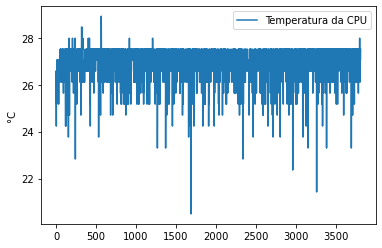

In [96]:
g = sns.lineplot(data=weather[['SYS/cpu/temperature/value']])
g.set_ylabel('°C')
g.legend(loc='upper right', labels=['Temperatura da CPU'])

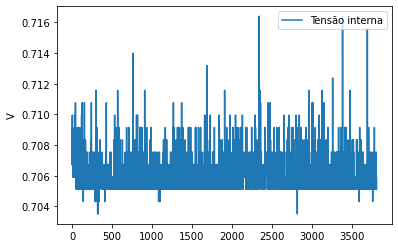

In [7]:
g = sns.lineplot(data=weather[['SYS/power/vsys/value']])
g.set_ylabel('V')
g.legend(loc='upper right', labels=['Tensão interna'])